In [1]:
import os
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import numpy as np

#hide warnings
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: d:\Projects\repos\tu060\tests


In [3]:
path = './../datasets/'

In [4]:
files = ['2023_6_10_16_17_17_atari_space_invaders.csv', '2023_6_11_00_40_56_atari_breakout.csv', '2023_6_11_01_43_35_atari_air_raid.csv', '2023_6_11_09_09_42_atari_asterix.csv', '2023_6_11_10_19_31_atari_bowling.csv', '2023_6_11_11_54_40_atari_aasteroids.csv', '2023_6_11_16_16_46_atari_demon_attack.csv', '2023_6_11_18_38_56_atari_freeway.csv', '2023_6_11_19_46_04_atari_gravitar.csv', '2023_6_11_21_07_40_atari_james_bond.csv', '2023_6_11_22_11_09_atari_pong.csv', '2023_6_11_23_14_08_ms_pac_man.csv', '2023_6_12_00_19_04_montezumas_revenge.csv', '2023_6_12_01_21_01_private_eye.csv', '2023_6_12_02_21_54_qbert.csv', '2023_6_12_03_20_59_sea_quest.csv', '2023_6_12_09_47_36_venture.csv', '2023_6_12_10_51_48wizard_of_wor.csv', '2023_6_12_13_19_31_yars_revenge.csv', '2023_6_12_15_05_14_zaxxon.csv', '2023_6_14_23_06_09_cart_pole.csv', '2023_6_14_23_20_07_addiction.csv', '2023_6_15_02_46_50_lunar_lander.csv']

In [6]:
df_rewards = pd.read_csv(path+files[0])

In [7]:
unique_categories = df_rewards['capacity'].unique()

In [8]:
for category in unique_categories:
    print(category)

1M
500k
100k
50k
10k
5k
1k
500


### Bulk Statistical Testing Function

In [14]:
def statisticalTesting(file):
    date = file.split('_')[0:6]  # Extract the date portion e.g 2023_6_10_16_17_17_atari_space_invaders.csv
    date_string = '_'.join(date)  # Reconstruct the date string
    title = file.replace(date_string + '_', '').replace('.csv', '')  # Remove the date portion from the original string # Remove the date and ".csv" extension
    title = title.replace('_', ' ').capitalize()
    print(title.capitalize() + " Sim")

    #import data
    df_rewards = pd.read_csv(file)
    print("Index: " + str(df_rewards.index))


    #print boxplot to plot mean reward
    #ax = sns.boxplot(x='capacity', y='reward', data=df_rewards, color='#77B150', width=0.5).set(title=title.capitalize() + ' Simulator: Box Plot of Rewards by Capacity Size')
    #plt.show()

    # Plot density plot of mean reward 
        #doesn't work on cat vars need to convert
    mapping = {
        '1M': 1000000,
        '500k': 500000,
        '100k': 100000,
        '50k': 50000,
        '10k': 10000,
        '5k': 5000,
        '1k': 1000,
        '500': 500
    }
    # Replace the strings with numeric values
    df_rewards['capacity'] = df_rewards['capacity'].replace(mapping)

    # Plot density plot for univariate 
    ax = sns.kdeplot(data=df_rewards, x='capacity', y='reward', fill=True, cmap='Blues', shade=True)
    ax.set(title=title.capitalize()) # + ' Simulator: Density Plot of Rewards by Capacity Size'

    # Set x-axis limit from 500 to 1 million
    plt.xlim(500, 1000000)  

    # Save the plot as a PNG file
    plt.savefig('./../plots/kde/'+ title.lower() +'.png', dpi=300)  # Specify the desired file path and DPI

    plt.show()

    # Plot density plot for bivariate 
    #ax = sns.kdeplot(data=df_rewards, x='reward', fill=True, color='blue', shade=True)#capacity
    #ax.set(title=title.capitalize() + ' Simulator: Density Plot of Capacity')
    #plt.show()

    # Plot density plot (violin plot)
    #ax = sns.violinplot(x='capacity', y='reward', data=df_rewards, palette='Blues')
    #ax.set(title=title.capitalize() + ' Simulator: Density Plot of Rewards by Capacity Size')
    #plt.show()

    print("\nShapiro-Wilk test")
    # The Shapiro-Wilk test, tests the null hypothesis that the data was drawn from a normal distribution this is an ANOVA assumption
    shapiro_test = stats.shapiro(df_rewards.reward.values) #(p 5%)
    print(shapiro_test)
    print(shapiro_test.statistic)
    print(shapiro_test.pvalue) #reject if less than 0.05

    if(shapiro_test.pvalue <1.0):
        print("\nKruskal-Wallis test")
        # Group the data by capacity
        grouped_data = df_rewards.groupby('capacity')['reward']

        # Create a list to store the data for each group
        groups = []

        # Iterate over the groups and extract the corresponding data
        for group, data in grouped_data:
            groups.append(data)

        # Perform Kruskal-Wallis test
        statistic, p_value = stats.kruskal(*groups)

        # Print the test statistic and p-value
        print("Kruskal-Wallis Test Statistic:", statistic)
        print("p-value:", p_value)

            # Perform Dunn's test
        print("\nDunn's Post Hoc Test")

        result = sp.posthoc_dunn(df_rewards, val_col='reward', group_col='capacity')

        # Print the pairwise comparison results
        """
        table shows pair wise results for different capacity groups:
        * 1.0 indicates no significant difference and no evidence to reject the null hypothesis
        * 0.0 indicate significant difference and to reject the null hypothesis.
        * For values between 0 and 1, smaller values indicate stronger evidence against the null hypothesis and a higher likelihood of a true difference between the groups.
        """
        print(result)


## Statistical Testing

Atari space invaders Sim
Index: RangeIndex(start=0, stop=1577, step=1)


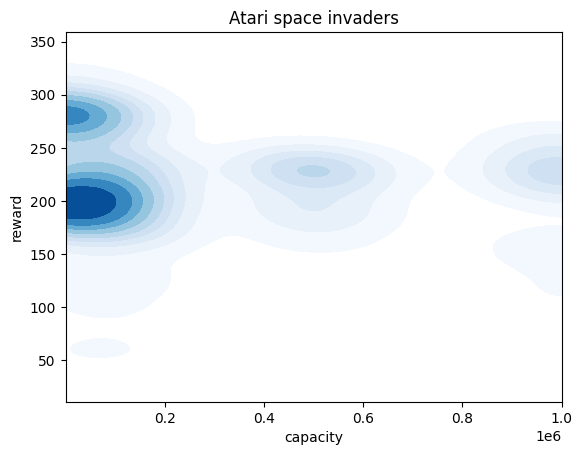


Shapiro-Wilk test
ShapiroResult(statistic=0.9578144550323486, pvalue=5.843757993461513e-21)
0.9578144550323486
5.843757993461513e-21

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 777.5710746758635
p-value: 1.2825666662854926e-163

Dunn's Post Hoc Test
              500            1000           5000          10000     
500      1.000000e+00   9.316997e-14   3.005112e-56  1.433059e-30  \
1000     9.316997e-14   1.000000e+00  8.346732e-119  1.638092e-79   
5000     3.005112e-56  8.346732e-119   1.000000e+00  1.719611e-05   
10000    1.433059e-30   1.638092e-79   1.719611e-05  1.000000e+00   
50000    4.013648e-24   7.916883e-69   1.373619e-08  1.698420e-01   
100000   4.535668e-33   1.249021e-83   1.266858e-04  6.375553e-01   
500000   1.687681e-15   2.863855e-53   5.278624e-15  4.289628e-04   
1000000  2.788754e-14   8.316611e-51   4.172545e-16  1.200960e-04   

              50000         100000        500000        1000000  
500      4.013648e-24  4.535668e-33  1.687681e-15  2.

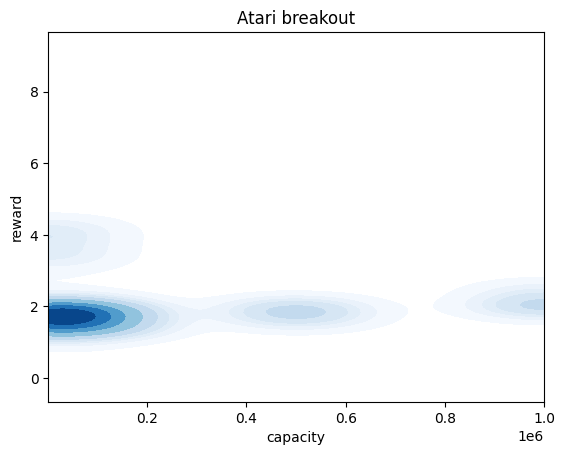


Shapiro-Wilk test
ShapiroResult(statistic=0.7534608244895935, pvalue=1.233142648605839e-43)
0.7534608244895935
1.233142648605839e-43

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 947.7439176321609
p-value: 2.34364525650881e-200

Dunn's Post Hoc Test
              500            1000           5000          10000     
500      1.000000e+00   6.057704e-63   3.722270e-20  1.907829e-01  \
1000     6.057704e-63   1.000000e+00  1.305159e-148  4.995064e-73   
5000     3.722270e-20  1.305159e-148   1.000000e+00  2.847068e-15   
10000    1.907829e-01   4.995064e-73   2.847068e-15  1.000000e+00   
50000    3.327633e-01   3.191334e-56   2.508748e-24  2.262620e-02   
100000   6.415099e-08  9.800148e-109   1.554497e-04  4.037348e-05   
500000   1.027205e-01   1.305822e-51   2.491190e-27  3.259786e-03   
1000000  1.260970e-22   3.465065e-12   1.819555e-80  1.133331e-28   

              50000          100000        500000        1000000  
500      3.327633e-01   6.415099e-08  1.027205e-01  1.

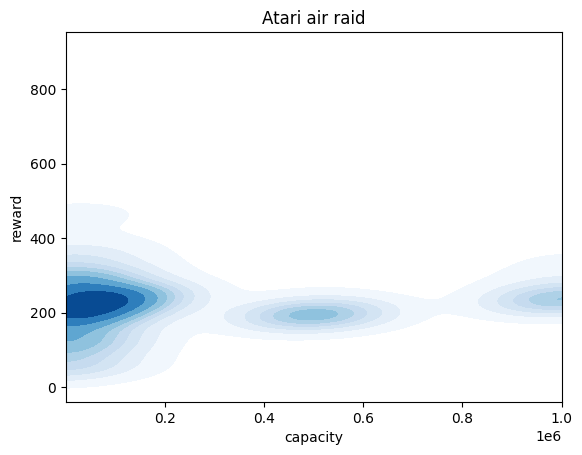


Shapiro-Wilk test
ShapiroResult(statistic=0.9034733772277832, pvalue=1.6225393663383106e-30)
0.9034733772277832
1.6225393663383106e-30

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 932.8008717468655
p-value: 3.958354147045707e-197

Dunn's Post Hoc Test
              500            1000           5000           10000     
500      1.000000e+00   4.827842e-16   5.621105e-53   1.558606e-09  \
1000     4.827842e-16   1.000000e+00  9.219856e-122   3.750789e-02   
5000     5.621105e-53  9.219856e-122   1.000000e+00  1.837374e-101   
10000    1.558606e-09   3.750789e-02  1.837374e-101   1.000000e+00   
50000    6.587827e-04   9.732203e-31   1.055601e-32   3.432265e-21   
100000   1.725209e-23   2.873547e-73   1.156096e-07   7.791940e-58   
500000   3.016641e-01   1.425189e-12   4.061468e-60   5.614977e-07   
1000000  6.737392e-19   7.403208e-65   1.278704e-10   2.150295e-50   

              50000         100000        500000        1000000  
500      6.587827e-04  1.725209e-23  3.0166

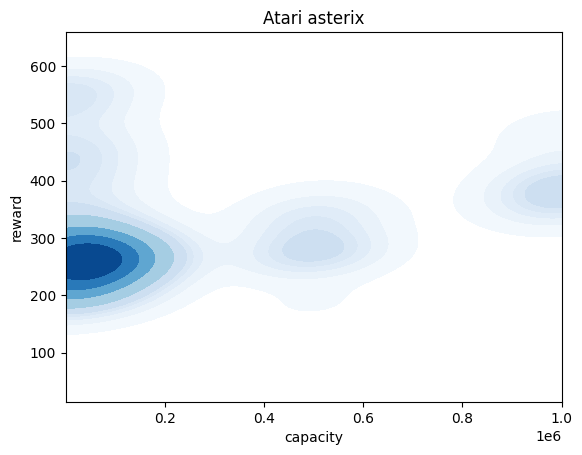


Shapiro-Wilk test
ShapiroResult(statistic=0.9117107391357422, pvalue=1.8397594752403207e-29)
0.9117107391357422
1.8397594752403207e-29

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 886.0963800838313
p-value: 4.826352437906447e-187

Dunn's Post Hoc Test
              500           1000          5000          10000         50000     
500      1.000000e+00  1.962239e-80  3.539668e-15  1.441837e-97  4.093428e-55  \
1000     1.962239e-80  1.000000e+00  1.140761e-28  4.913257e-02  8.030827e-04   
5000     3.539668e-15  1.140761e-28  1.000000e+00  4.520232e-39  8.712878e-15   
10000    1.441837e-97  4.913257e-02  4.520232e-39  1.000000e+00  1.042419e-07   
50000    4.093428e-55  8.030827e-04  8.712878e-15  1.042419e-07  1.000000e+00   
100000   3.957922e-92  1.727321e-01  1.061759e-35  5.458689e-01  2.414644e-06   
500000   1.381979e-38  2.041729e-09  3.153489e-07  1.694292e-15  8.224258e-03   
1000000  3.855003e-04  1.137590e-53  1.595898e-05  9.662867e-68  1.488879e-33   

          

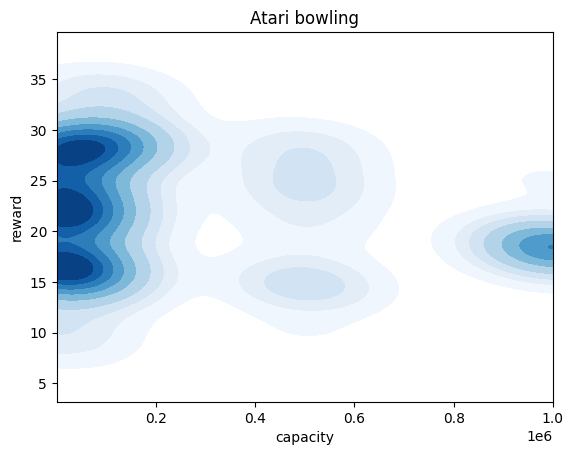


Shapiro-Wilk test
ShapiroResult(statistic=0.9780729413032532, pvalue=1.174988519024936e-13)
0.9780729413032532
1.174988519024936e-13

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 864.3036435174544
p-value: 2.448369518757008e-182

Dunn's Post Hoc Test
              500           1000           5000          10000     
500      1.000000e+00  8.346041e-05   3.302768e-25  5.631591e-06  \
1000     8.346041e-05  1.000000e+00   5.078568e-89  1.730136e-32   
5000     3.302768e-25  5.078568e-89   1.000000e+00  3.155952e-16   
10000    5.631591e-06  1.730136e-32   3.155952e-16  1.000000e+00   
50000    2.721184e-03  4.122393e-22   1.121177e-24  3.260286e-02   
100000   2.014678e-15  2.006480e-08  8.972903e-143  1.088374e-67   
500000   2.173841e-03  1.329871e-22   2.110234e-24  4.000819e-02   
1000000  4.620118e-07  3.052299e-36   8.239230e-14  4.822849e-01   

              50000          100000        500000        1000000  
500      2.721184e-03   2.014678e-15  2.173841e-03  4.620118e-

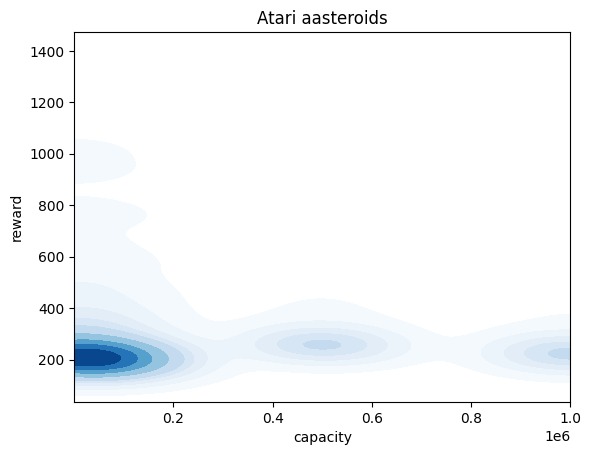


Shapiro-Wilk test
ShapiroResult(statistic=0.5646759271621704, pvalue=0.0)
0.5646759271621704
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 502.5673145684723
p-value: 2.2493324404923887e-104

Dunn's Post Hoc Test
              500           1000          5000          10000         50000     
500      1.000000e+00  4.333809e-06  3.678117e-17  5.235286e-03  6.911524e-32  \
1000     4.333809e-06  1.000000e+00  7.961805e-39  1.304561e-13  3.800022e-60   
5000     3.678117e-17  7.961805e-39  1.000000e+00  1.554583e-08  8.180169e-04   
10000    5.235286e-03  1.304561e-13  1.554583e-08  1.000000e+00  2.256544e-19   
50000    6.911524e-32  3.800022e-60  8.180169e-04  2.256544e-19  1.000000e+00   
100000   1.745639e-05  6.175247e-19  3.931582e-05  1.282567e-01  9.825725e-14   
500000   4.353698e-09  1.969305e-01  2.699316e-46  4.055233e-18  2.493831e-69   
1000000  1.818758e-01  2.868327e-09  1.246463e-12  1.450164e-01  1.683664e-25   

              100000        500000        10000

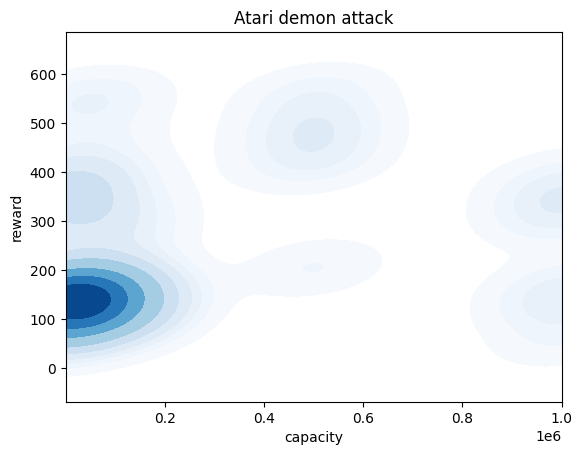


Shapiro-Wilk test
ShapiroResult(statistic=0.8532755374908447, pvalue=1.2204849908689756e-35)
0.8532755374908447
1.2204849908689756e-35

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 766.447341161516
p-value: 3.2208028054007444e-161

Dunn's Post Hoc Test
              500            1000          5000          10000     
500      1.000000e+00   1.939832e-01  7.517686e-16  3.760789e-59  \
1000     1.939832e-01   1.000000e+00  5.929467e-21  3.277647e-69   
5000     7.517686e-16   5.929467e-21  1.000000e+00  4.449074e-16   
10000    3.760789e-59   3.277647e-69  4.449074e-16  1.000000e+00   
50000    3.013853e-22   2.621803e-28  9.923976e-02  1.044209e-10   
100000   3.695708e-04   1.088130e-06  6.447916e-06  9.317362e-37   
500000   6.711655e-89  1.115487e-100  1.128280e-34  5.155532e-06   
1000000  2.527515e-19   5.487923e-25  3.652890e-01  4.565599e-13   

              50000         100000         500000        1000000  
500      3.013853e-22  3.695708e-04   6.711655e-89  2.527515

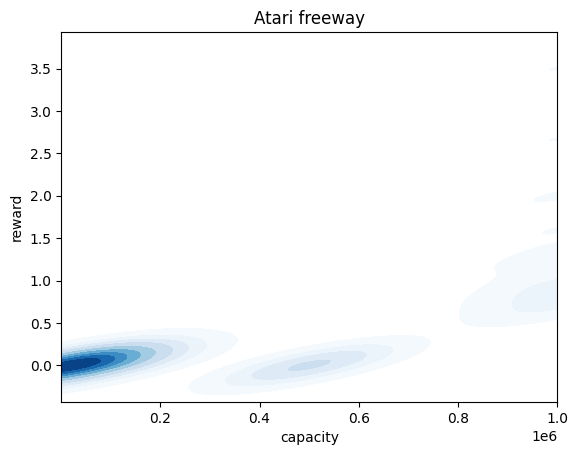


Shapiro-Wilk test
ShapiroResult(statistic=0.36500805616378784, pvalue=0.0)
0.36500805616378784
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 1510.0451051242528
p-value: 0.0

Dunn's Post Hoc Test
               500            1000           5000           10000     
500       1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00  \
1000      1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00   
5000      1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00   
10000     1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00   
50000     1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00   
100000    1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00   
500000    1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00   
1000000  1.150317e-189  1.150317e-189  1.150317e-189  1.150317e-189   

               50000          100000         500000         1000000  
500       1.000000e+00   1.000000e+00   1.000000e+00  1.150317e-189  
1000      1.00

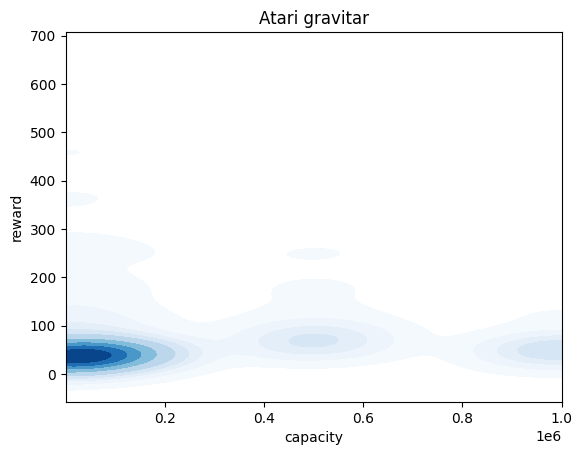


Shapiro-Wilk test
ShapiroResult(statistic=0.5638512372970581, pvalue=0.0)
0.5638512372970581
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 592.2228825667135
p-value: 1.1512416384186485e-123

Dunn's Post Hoc Test
              500            1000          5000          10000     
500      1.000000e+00   7.579754e-23  2.037037e-01  6.740270e-12  \
1000     7.579754e-23   1.000000e+00  1.165600e-17  1.247607e-62   
5000     2.037037e-01   1.165600e-17  1.000000e+00  4.459299e-16   
10000    6.740270e-12   1.247607e-62  4.459299e-16  1.000000e+00   
50000    2.337837e-02   8.323848e-34  4.047389e-04  4.133707e-06   
100000   8.268860e-01   9.561897e-24  1.367838e-01  3.231371e-11   
500000   1.795128e-34  4.453875e-108  1.561575e-41  7.384094e-08   
1000000  3.839038e-07   2.568274e-50  2.277197e-10  7.405304e-02   

              50000         100000         500000        1000000  
500      2.337837e-02  8.268860e-01   1.795128e-34  3.839038e-07  
1000     8.323848e-34  9.56189

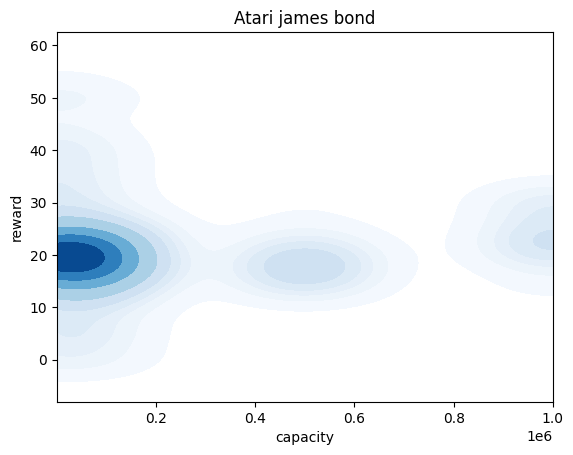


Shapiro-Wilk test
ShapiroResult(statistic=0.9225150346755981, pvalue=8.509140791396769e-28)
0.9225150346755981
8.509140791396769e-28

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 707.1068894113187
p-value: 2.0245311098186324e-148

Dunn's Post Hoc Test
               500           1000          5000          10000     
500       1.000000e+00  1.580564e-38  1.760924e-87  9.927199e-54  \
1000      1.580564e-38  1.000000e+00  7.592492e-12  1.421044e-02   
5000      1.760924e-87  7.592492e-12  1.000000e+00  1.112144e-05   
10000     9.927199e-54  1.421044e-02  1.112144e-05  1.000000e+00   
50000    3.033161e-112  1.520531e-21  7.199446e-03  1.424885e-12   
100000    7.788417e-55  8.915274e-03  2.329146e-05  8.702140e-01   
500000    1.387064e-73  2.399761e-07  9.282614e-02  6.658441e-03   
1000000   4.517726e-18  1.592681e-05  6.292171e-29  1.311505e-11   

               50000         100000        500000        1000000  
500      3.033161e-112  7.788417e-55  1.387064e-73  4.517726e

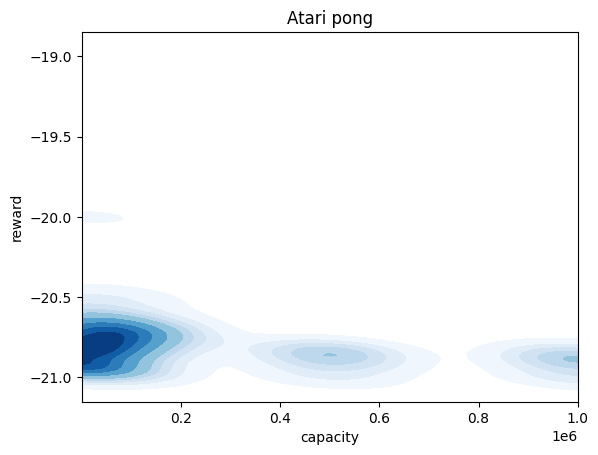


Shapiro-Wilk test
ShapiroResult(statistic=0.7237859964370728, pvalue=4.203895392974451e-45)
0.7237859964370728
4.203895392974451e-45

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 965.2963032925753
p-value: 3.787234050623528e-204

Dunn's Post Hoc Test
              500           1000          5000          10000         50000     
500      1.000000e+00  3.288668e-10  2.848476e-37  1.708018e-12  9.355349e-41  \
1000     3.288668e-10  1.000000e+00  9.001403e-81  1.336951e-40  5.548536e-86   
5000     2.848476e-37  9.001403e-81  1.000000e+00  1.132387e-08  5.528950e-01   
10000    1.708018e-12  1.336951e-40  1.132387e-08  1.000000e+00  2.770442e-10   
50000    9.355349e-41  5.548536e-86  5.528950e-01  2.770442e-10  1.000000e+00   
100000   2.235940e-43  9.801308e-90  2.932336e-01  1.360973e-11  6.462558e-01   
500000   1.257217e-01  2.000955e-06  2.665221e-46  8.876654e-18  3.357636e-50   
1000000  1.112733e-04  1.552372e-02  5.277265e-62  9.142993e-28  1.523517e-66   

            

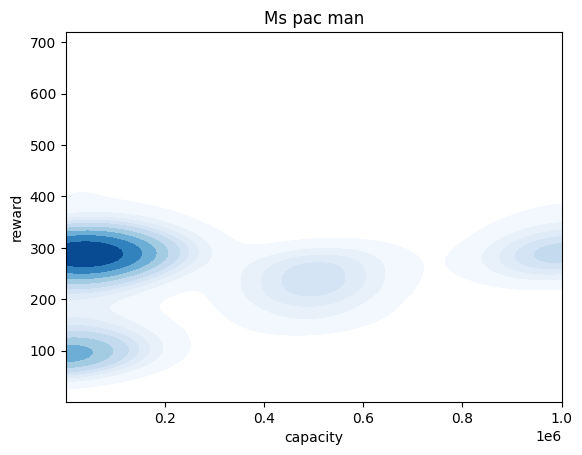


Shapiro-Wilk test
ShapiroResult(statistic=0.8682863712310791, pvalue=1.6096365570046136e-34)
0.8682863712310791
1.6096365570046136e-34

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 1054.046564174091
p-value: 2.5220642714393058e-223

Dunn's Post Hoc Test
               500            1000          5000           10000     
500       1.000000e+00   3.067466e-01  1.474164e-76  7.226941e-117  \
1000      3.067466e-01   1.000000e+00  1.017096e-68  3.857395e-107   
5000      1.474164e-76   1.017096e-68  1.000000e+00   9.021597e-06   
10000    7.226941e-117  3.857395e-107  9.021597e-06   1.000000e+00   
50000     6.962366e-27   2.350442e-22  5.882155e-15   1.460178e-34   
100000    1.649913e-56   8.488442e-50  6.899826e-03   8.672539e-13   
500000    1.002120e-09   3.516037e-07  1.740950e-35   5.041449e-64   
1000000   6.458903e-80   6.652565e-72  6.804653e-01   5.648427e-05   

              50000         100000        500000        1000000  
500      6.962366e-27  1.649913e-56  1.002

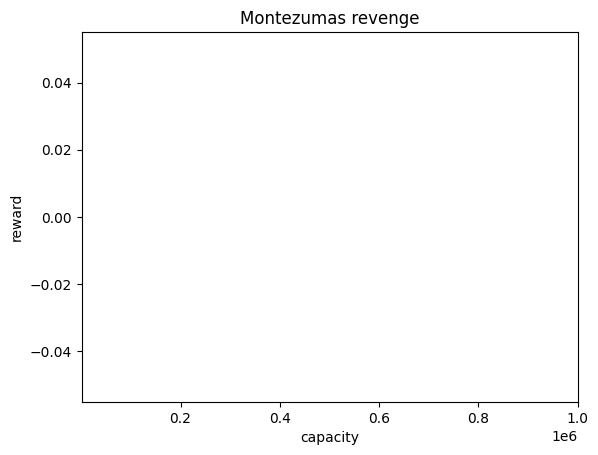


Shapiro-Wilk test
ShapiroResult(statistic=1.0, pvalue=1.0)
1.0
1.0
Private eye Sim
Index: RangeIndex(start=0, stop=1496, step=1)


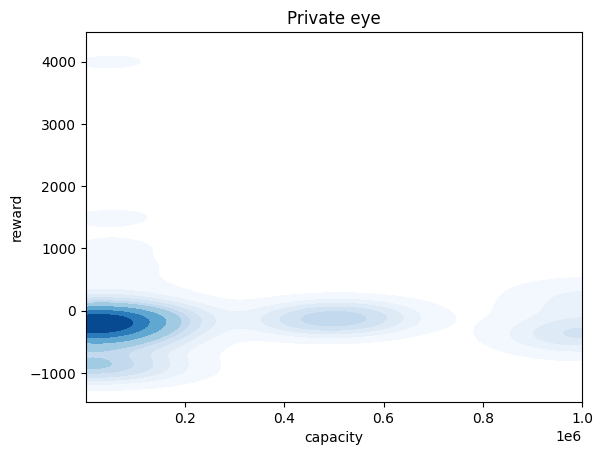


Shapiro-Wilk test
ShapiroResult(statistic=0.6321684122085571, pvalue=0.0)
0.6321684122085571
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 561.3830975953758
p-value: 5.0127708276699685e-117

Dunn's Post Hoc Test
              500           1000          5000          10000         50000     
500      1.000000e+00  1.110788e-01  1.085786e-69  1.351228e-13  2.094921e-01  \
1000     1.110788e-01  1.000000e+00  5.449127e-58  6.334580e-09  4.394987e-03   
5000     1.085786e-69  5.449127e-58  1.000000e+00  1.242448e-24  1.112813e-79   
10000    1.351228e-13  6.334580e-09  1.242448e-24  1.000000e+00  4.885982e-18   
50000    2.094921e-01  4.394987e-03  1.112813e-79  4.885982e-18  1.000000e+00   
100000   3.725242e-06  2.423058e-03  9.394449e-39  5.522065e-03  4.075144e-09   
500000   8.065789e-02  8.370470e-04  8.805496e-84  5.803985e-20  6.227771e-01   
1000000  1.969678e-04  3.321198e-02  4.562671e-44  2.349179e-04  6.429866e-07   

              100000        500000        10000

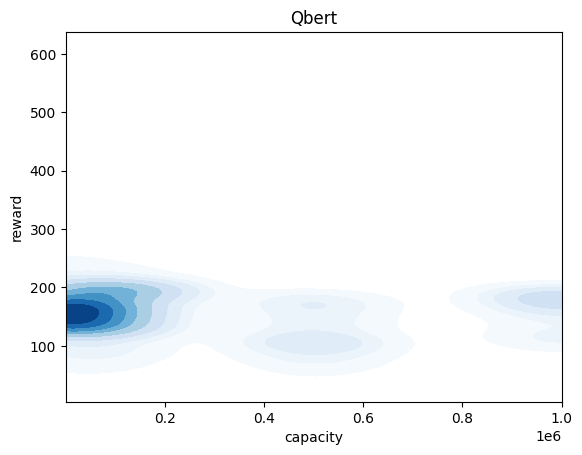


Shapiro-Wilk test
ShapiroResult(statistic=0.8128944635391235, pvalue=1.6476046953991902e-39)
0.8128944635391235
1.6476046953991902e-39

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 697.0265906220914
p-value: 3.01778775578848e-146

Dunn's Post Hoc Test
              500           1000          5000          10000         50000     
500      1.000000e+00  4.541016e-21  2.815219e-03  6.568812e-01  5.285587e-15  \
1000     4.541016e-21  1.000000e+00  1.360912e-10  5.990898e-23  1.097366e-01   
5000     2.815219e-03  1.360912e-10  1.000000e+00  6.016068e-04  1.415271e-06   
10000    6.568812e-01  5.990898e-23  6.016068e-04  1.000000e+00  1.406986e-16   
50000    5.285587e-15  1.097366e-01  1.415271e-06  1.406986e-16  1.000000e+00   
100000   3.776718e-28  1.102500e-92  2.233249e-44  4.723174e-26  5.083448e-79   
500000   1.660647e-26  2.167417e-01  1.949943e-14  1.271925e-28  4.588067e-03   
1000000  6.750023e-01  7.677664e-23  6.592465e-04  9.801103e-01  1.733440e-16   

           

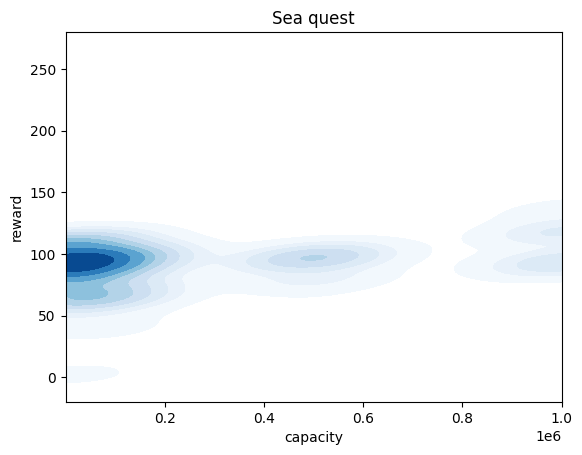


Shapiro-Wilk test
ShapiroResult(statistic=0.8149023056030273, pvalue=2.9031611129419046e-39)
0.8149023056030273
2.9031611129419046e-39

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 754.5933792648599
p-value: 1.1618243951561244e-158

Dunn's Post Hoc Test
              500           1000          5000          10000     
500      1.000000e+00  1.247012e-08  7.448806e-16  2.557714e-03  \
1000     1.247012e-08  1.000000e+00  5.390817e-43  7.194159e-03   
5000     7.448806e-16  5.390817e-43  1.000000e+00  1.410652e-28   
10000    2.557714e-03  7.194159e-03  1.410652e-28  1.000000e+00   
50000    6.207603e-50  9.635112e-94  1.164405e-11  1.252993e-71   
100000   4.811910e-01  1.588047e-10  1.859321e-13  1.978833e-04   
500000   7.983441e-01  5.388071e-08  8.914417e-17  5.769240e-03   
1000000  6.889742e-14  7.043778e-02  2.460636e-54  6.975157e-06   

               50000         100000        500000         1000000  
500       6.207603e-50  4.811910e-01  7.983441e-01   6.889742e-14  

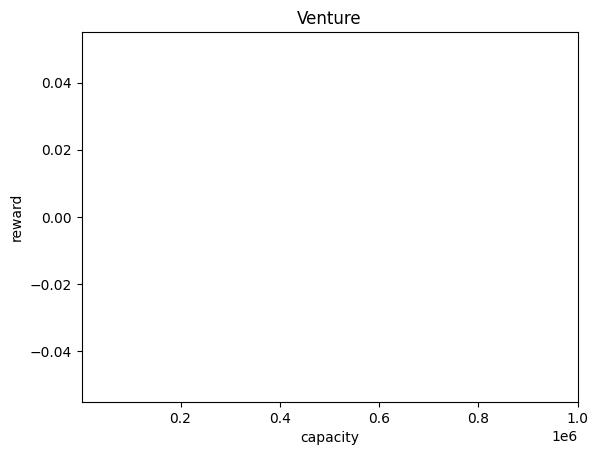


Shapiro-Wilk test
ShapiroResult(statistic=1.0, pvalue=1.0)
1.0
1.0
Of wor Sim
Index: RangeIndex(start=0, stop=1568, step=1)


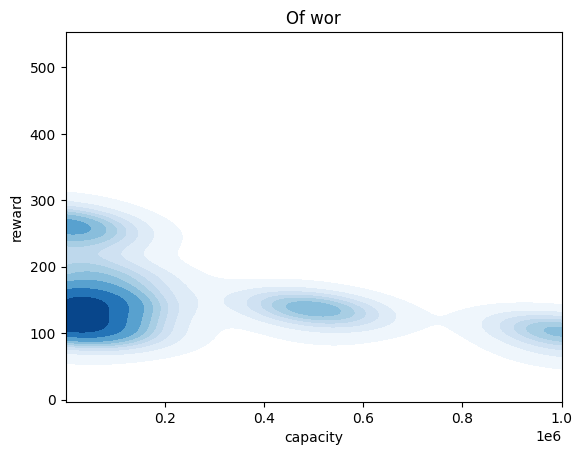


Shapiro-Wilk test
ShapiroResult(statistic=0.8824505805969238, pvalue=6.868608183106481e-33)
0.8824505805969238
6.868608183106481e-33

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 819.3876572780374
p-value: 1.2146608050145877e-172

Dunn's Post Hoc Test
              500            1000          5000          10000     
500      1.000000e+00   5.792021e-64  1.004432e-28  5.091859e-02  \
1000     5.792021e-64   1.000000e+00  5.806325e-09  5.885138e-79   
5000     1.004432e-28   5.806325e-09  1.000000e+00  5.382260e-39   
10000    5.091859e-02   5.885138e-79  5.382260e-39  1.000000e+00   
50000    3.636395e-11   1.784083e-24  8.919301e-06  1.184605e-17   
100000   1.699599e-11   4.473012e-24  1.396329e-05  4.384486e-18   
500000   7.232464e-03   3.541590e-46  2.466531e-17  3.450042e-06   
1000000  5.323276e-13  1.065708e-128  1.786043e-75  1.517707e-07   

              50000         100000        500000         1000000  
500      3.636395e-11  1.699599e-11  7.232464e-03   5.323276e

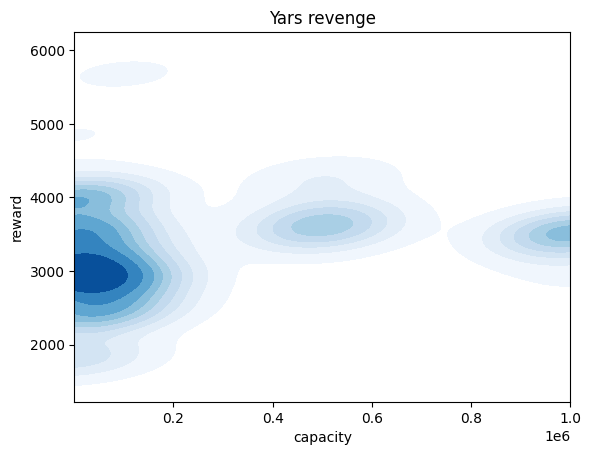


Shapiro-Wilk test
ShapiroResult(statistic=0.962868869304657, pvalue=3.097627767346168e-19)
0.962868869304657
3.097627767346168e-19

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 963.3013315588547
p-value: 1.0216054721915628e-203

Dunn's Post Hoc Test
               500            1000          5000          10000     
500       1.000000e+00  2.727328e-105  2.177415e-79  4.174282e-34  \
1000     2.727328e-105   1.000000e+00  3.093003e-03  7.917831e-22   
5000      2.177415e-79   3.093003e-03  1.000000e+00  2.762514e-11   
10000     4.174282e-34   7.917831e-22  2.762514e-11  1.000000e+00   
50000    3.805922e-110   6.123440e-01  5.288167e-04  5.139788e-24   
100000    1.420415e-63   6.266139e-04  4.991131e-01  3.701808e-08   
500000    7.667111e-05   1.440023e-71  1.565519e-50  1.550224e-16   
1000000   9.524903e-22   2.246942e-34  1.637267e-20  9.062798e-03   

               50000         100000        500000        1000000  
500      3.805922e-110  1.420415e-63  7.667111e-05  9.

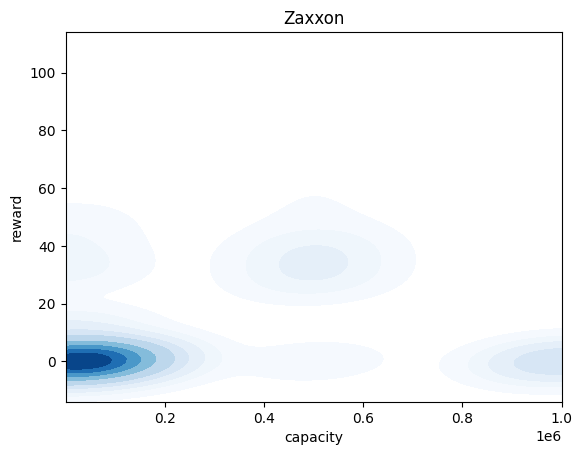


Shapiro-Wilk test
ShapiroResult(statistic=0.5171675682067871, pvalue=0.0)
0.5171675682067871
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 910.0019016123044
p-value: 3.3223079483999274e-192

Dunn's Post Hoc Test
              500           1000           5000           10000     
500      1.000000e+00  3.139196e-06   9.435755e-13   9.435755e-13  \
1000     3.139196e-06  1.000000e+00   3.903493e-32   3.903493e-32   
5000     9.435755e-13  3.903493e-32   1.000000e+00   1.000000e+00   
10000    9.435755e-13  3.903493e-32   1.000000e+00   1.000000e+00   
50000    9.435755e-13  3.903493e-32   1.000000e+00   1.000000e+00   
100000   9.435755e-13  3.903493e-32   1.000000e+00   1.000000e+00   
500000   4.233394e-48  3.747653e-23  1.633003e-104  1.633003e-104   
1000000  9.435755e-13  3.903493e-32   1.000000e+00   1.000000e+00   

               50000          100000         500000         1000000  
500       9.435755e-13   9.435755e-13   4.233394e-48   9.435755e-13  
1000      3.903

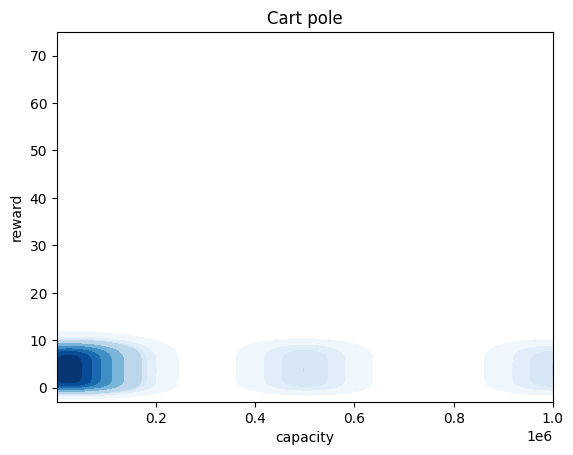


Shapiro-Wilk test
ShapiroResult(statistic=0.608319878578186, pvalue=0.0)
0.608319878578186
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 123.9261028252332
p-value: 1.1644834880900072e-23

Dunn's Post Hoc Test
              500           1000          5000          10000         50000     
500      1.000000e+00  1.424866e-12  8.491813e-01  4.281976e-01  3.710146e-01  \
1000     1.424866e-12  1.000000e+00  1.101309e-17  4.861787e-15  1.302615e-14   
5000     8.491813e-01  1.101309e-17  1.000000e+00  4.600669e-01  3.873483e-01   
10000    4.281976e-01  4.861787e-15  4.600669e-01  1.000000e+00  8.999534e-01   
50000    3.710146e-01  1.302615e-14  3.873483e-01  8.999534e-01  1.000000e+00   
100000   1.490402e-02  6.194687e-09  5.724592e-03  4.282460e-02  5.745805e-02   
500000   3.944494e-01  8.615110e-15  4.170242e-01  9.419177e-01  9.578417e-01   
1000000  9.693241e-01  2.180206e-18  8.525770e-01  3.551708e-01  2.935769e-01   

              100000        500000        1000000 

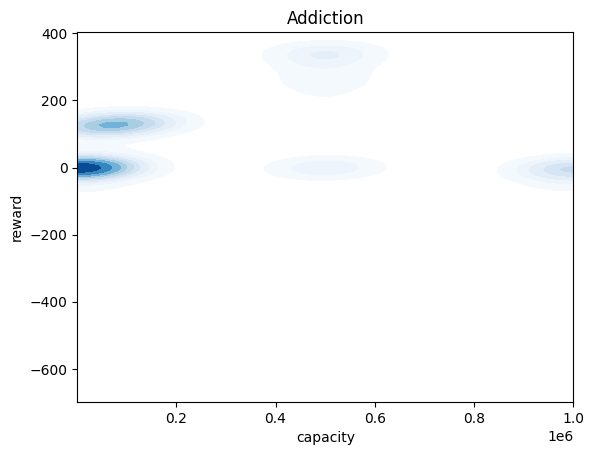


Shapiro-Wilk test
ShapiroResult(statistic=0.7308021187782288, pvalue=0.0)
0.7308021187782288
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 22311.574258481738
p-value: 0.0

Dunn's Post Hoc Test
               500            1000           5000           10000     
500       1.000000e+00   8.096091e-38   0.000000e+00   2.765662e-94  \
1000      8.096091e-38   1.000000e+00   0.000000e+00  2.228183e-245   
5000      0.000000e+00   0.000000e+00   1.000000e+00  4.193447e-180   
10000     2.765662e-94  2.228183e-245  4.193447e-180   1.000000e+00   
50000     0.000000e+00  5.635240e-137   0.000000e+00   0.000000e+00   
100000    0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
500000   4.672823e-295  8.469628e-126   0.000000e+00   0.000000e+00   
1000000   0.000000e+00   0.000000e+00   1.089904e-01  1.325119e-200   

               50000         100000         500000         1000000  
500       0.000000e+00  0.000000e+00  4.672823e-295   0.000000e+00  
1000     5.635240e

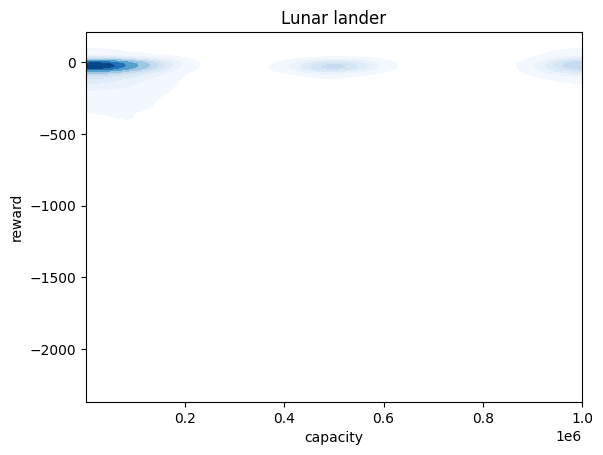


Shapiro-Wilk test
ShapiroResult(statistic=0.4664379358291626, pvalue=0.0)
0.4664379358291626
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 6789.996076300662
p-value: 0.0

Dunn's Post Hoc Test
               500            1000           5000          10000     
500       1.000000e+00  1.251252e-267   1.154355e-18  0.000000e+00  \
1000     1.251252e-267   1.000000e+00  1.125349e-125  2.800160e-51   
5000      1.154355e-18  1.125349e-125   1.000000e+00  0.000000e+00   
10000     0.000000e+00   2.800160e-51   0.000000e+00  1.000000e+00   
50000     1.555694e-14  3.751828e-135   3.174062e-01  0.000000e+00   
100000    0.000000e+00   2.758880e-22  6.151745e-279  1.540618e-12   
500000    1.852748e-12  6.642964e-141   1.167479e-01  0.000000e+00   
1000000   8.470894e-11   0.000000e+00   1.561614e-49  0.000000e+00   

               50000          100000         500000        1000000  
500       1.555694e-14   0.000000e+00   1.852748e-12  8.470894e-11  
1000     3.751828e-135   2.7

In [15]:
for f in files:
    fl = path+f #file location
    statisticalTesting(fl)